In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
import importlib

sys.path.append(os.path.join(os.getcwd(), 'NeuralNetworks'))
import Fully_connected_network as fc
importlib.reload(fc)

<module 'Fully_connected_network' from '/home/lucas/Desktop/PFE/MyCode/NeuralNetworks/Fully_connected_network.py'>

In [29]:
def u_true(x):
    term1 = np.sin(2*x + 1)
    term2 = 0.2*np.exp(1.3*x)
    return term1 + term2

In [30]:
class MSELoss(torch.nn.Module):
    def __init__(self):
        super(MSELoss, self).__init__()
        self.mse = torch.nn.MSELoss()

    def forward(self, u_pred, u_true):
        self.loss = self.mse(u_pred, u_true)
        return self.loss

In [51]:
def closure_lbfgs(optimizer_lbfgs, model, x_train, y_train, criterion):
    optimizer_lbfgs.zero_grad()
    u_pred = model(x_train)
    loss = criterion(u_pred, y_train)
    loss.backward()
    return loss

In [66]:
x_np = np.linspace(-1, 1, 300)
x_torch = torch.FloatTensor(x_np).reshape(300, 1)
u_exact = torch.FloatTensor(u_true(x_np)).reshape(300, 1)

x_torch.requires_grad = True
u_exact.requires_grad = True

fc_model = fc.FullyConnectedNetwork()
criterion = MSELoss()
model_optimizer_adam = torch.optim.Adam(fc_model.parameters(), lr=0.0005)
model_optimizer_lbfgs = torch.optim.LBFGS(fc_model.parameters(), lr=1)
n_iter_adam = 3000
n_iter_lbfgs = 1000

train_loss = []

fc_model.train()
for iter_adam_i in range(n_iter_adam):

    model_optimizer_adam.zero_grad()

    u_pred = fc_model(x_torch)
    loss = criterion(u_pred, u_exact)

    train_loss.append(loss.item())

    loss.backward()
    model_optimizer_adam.step()

    if iter_adam_i % 25 == 0:
        print(f'Iter {iter_adam_i}, Loss: {loss.item()}')

for iter_lbfgs_i in range(n_iter_lbfgs):
    model_optimizer_lbfgs.step(lambda: closure_lbfgs(model_optimizer_lbfgs, fc_model, x_torch, u_exact, criterion))
    loss = closure_lbfgs(model_optimizer_lbfgs, fc_model, x_torch, u_exact, criterion).item()

    train_loss.append(loss)
    
    if iter_lbfgs_i % 25 == 0:
        print(f'Iter {iter_lbfgs_i+n_iter_adam}, Loss: {loss}')

Iter 0, Loss: 0.678105354309082
Iter 25, Loss: 0.3987826704978943
Iter 50, Loss: 0.2713402807712555
Iter 75, Loss: 0.15949875116348267
Iter 100, Loss: 0.09105861186981201
Iter 125, Loss: 0.07638614624738693
Iter 150, Loss: 0.07039429992437363
Iter 175, Loss: 0.06446889787912369
Iter 200, Loss: 0.05872855335474014
Iter 225, Loss: 0.05310347303748131
Iter 250, Loss: 0.04759226366877556
Iter 275, Loss: 0.04222213104367256
Iter 300, Loss: 0.03705114871263504
Iter 325, Loss: 0.032149672508239746
Iter 350, Loss: 0.027573175728321075
Iter 375, Loss: 0.023347990587353706
Iter 400, Loss: 0.019476648420095444
Iter 425, Loss: 0.015957342460751534
Iter 450, Loss: 0.01280259434133768
Iter 475, Loss: 0.010042297653853893
Iter 500, Loss: 0.007708921562880278
Iter 525, Loss: 0.005817180033773184
Iter 550, Loss: 0.004351378884166479
Iter 575, Loss: 0.0032652129884809256
Iter 600, Loss: 0.0024913777597248554
Iter 625, Loss: 0.0019554859027266502
Iter 650, Loss: 0.001588531187735498
Iter 675, Loss: 0.001

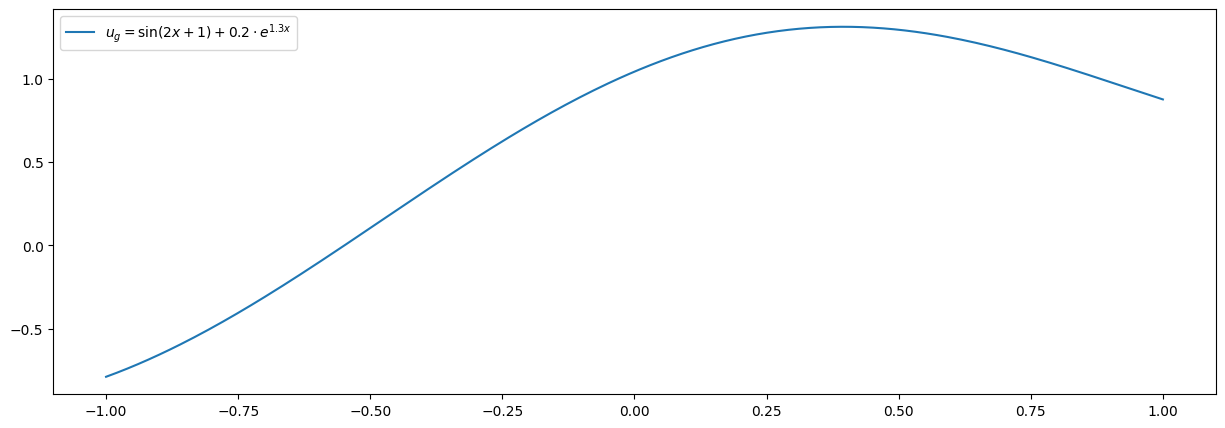

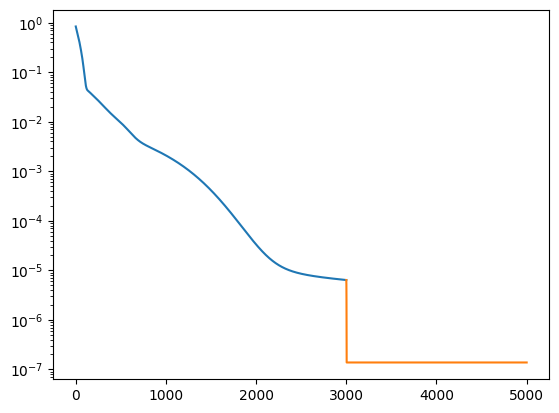

In [64]:
plt.figure(figsize=(15, 5))
plt.plot(x_np, u_true(x_np), label=r'$u_g = \sin(2x + 1) + 0.2\cdot e^{1.3x}$')
plt.legend()
plt.show()

plt.plot(np.linspace(0, n_iter_adam, n_iter_adam), train_loss[:n_iter_adam])
plt.plot(np.linspace(n_iter_adam, n_iter_adam+n_iter_lbfgs, n_iter_lbfgs+1), train_loss[n_iter_adam-1:])
plt.yscale('log')
plt.show()